In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd


In [30]:
df = pd.read_excel('../data/male_female_merged.xlsx')

In [31]:
# import pandas as pd
# import statsmodels.api as sm
# from sklearn.linear_model import LogisticRegression

# # Update the 'gender' column to 1 for male and 0 for female
# df['gender'] = df['gender'].map({'male': 1, 'female': 0})

# # Filter the dataset for the specified keywords
# keywords = ['education', 'school', 'university', 'women', 'girl']
# df_filtered = df[df['text'].str.contains('|'.join(keywords))]

# # Assign the predictor variable (X) and the target variable (y)
# X = df_filtered[['gender']]
# y = df_filtered['sentiment']

# # Add a constant term to the predictor variables
# X = sm.add_constant(X)

# # Create and fit the logistic regression model
# model = sm.MNLogit(y, X)
# model_fit = model.fit()

# # Print the summary
# print(model_fit.summary())


In [32]:

df.loc[df['gender'] == 'female', 'sex'] = 0
df.loc[df['gender'] == 'male', 'sex'] = 1

X = df[['sex']]  
y = df['label']  
# Add a constant term to the predictor variables
X = sm.add_constant(X)
# Fit the logistic regression model
model = sm.Logit(y, X).fit()
# Print the summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.666075
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                51916
Model:                          Logit   Df Residuals:                    51914
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 May 2023   Pseudo R-squ.:               0.0002553
Time:                        00:26:46   Log-Likelihood:                -34580.
converged:                       True   LL-Null:                       -34589.
Covariance Type:            nonrobust   LLR p-value:                 2.638e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4439      0.011    -40.423      0.000      -0.465      -0.422
sex           -0.0809      0.

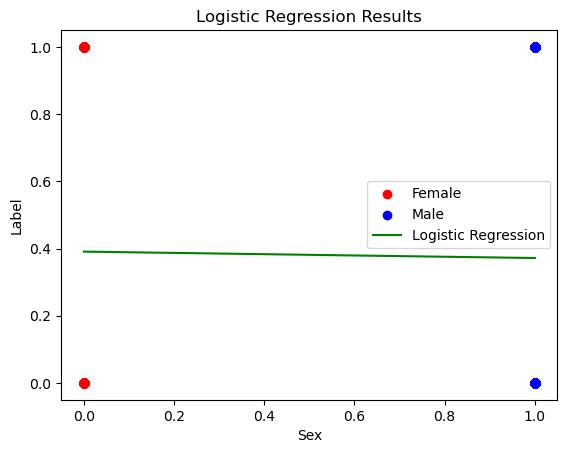

In [8]:
import matplotlib.pyplot as plt

# Separate the data points by gender
female_data = df.loc[df['gender'] == 'female']
male_data = df.loc[df['gender'] == 'male']

# Plot the actual data points
plt.scatter(female_data['sex'], female_data['label'], color='red', label='Female')
plt.scatter(male_data['sex'], male_data['label'], color='blue', label='Male')

# Plot the logistic regression curve
x_range = np.linspace(df['sex'].min(), df['sex'].max(), 100)
x_range = sm.add_constant(x_range)
y_pred = model.predict(x_range)
plt.plot(x_range[:, 1], y_pred, color='green', label='Logistic Regression')

# Set plot labels and title
plt.xlabel('Sex')
plt.ylabel('Label')
plt.title('Logistic Regression Results')

# Add a legend
plt.legend()

# Display the plot
plt.show()
